# Self-Driving Car Engineer Nanodegree

## Project: Advanced Lane Finding

The project goals are as follows:  
1. Develop code for lane finding in the test images
2. Develop code for lane finding in the project video
3. Test and improvide lane finding pipeline for challenge videos (optional)

---

## Goal 1: Lane finding in the test images

### Import Packages

In [26]:
#importing some useful packages

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

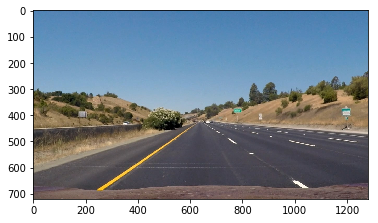

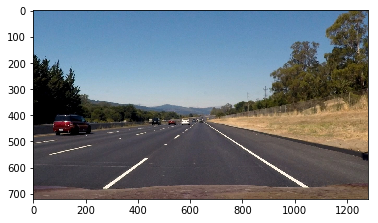

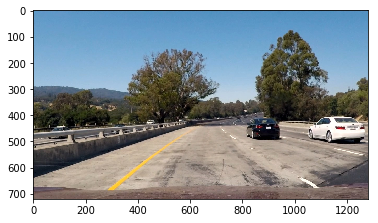

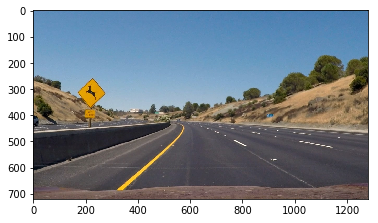

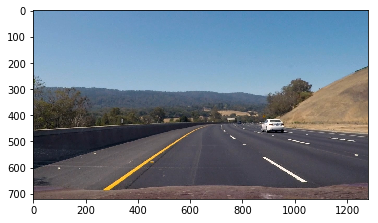

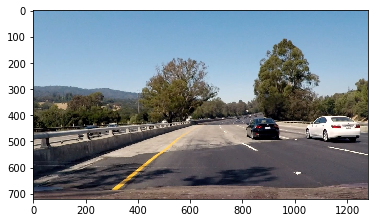

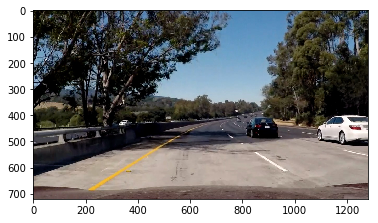

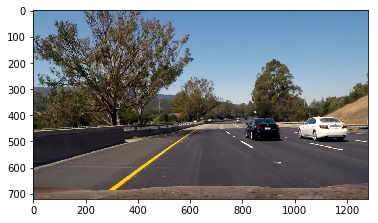

In [27]:
#reading in an image

lane_images = glob.glob('test_images/*.jpg')

k = 0
for fname in lane_images:
    image = mpimg.imread(fname)
    plt.figure(k)
    plt.imshow(image)
    k = k+1
    


### Camera Calibration

In [43]:
import glob

def calibrate():


    nx = 9 # the number of inside corners in x
    ny = 6 # the number of inside corners in y
    
    objpoints = []
    imgpoints = []
    
    objp = np.zeros((nx*ny,3),np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)    
    
    drawPic = False        
    
    calib_images = glob.glob('camera_cal/calibration*.jpg')

    for fname in calib_images:
        
        img = mpimg.imread(fname)

        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

        if ret == True:

            imgpoints.append(corners)
            objpoints.append(objp)

            if drawPic == True:
                #img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
                #plt.figure(10)
                #plt.imshow(img)

                plt.figure(10, figsize=(12,9))
                plt.imshow(gray,cmap='gray')
                for k in range(0,len(corners)):
                    x = corners[k][0][0]
                    y = corners[k][0][1]           
                    plt.plot(x,y,'ro')

        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        img_size = gray.shape
        dst = np.float32([[0,0],[img_size[1],0],[img_size[1],img_size[0]],[0,img_size[0]]])
    
    print(img_size)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    drawPic = True    
    if drawPic == True:
        
        img = mpimg.imread('camera_cal/test/calibration1.jpg')
        
        undist = cv2.undistort(img, mtx, dist, None, mtx)

        plt.figure(11)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.tight_layout()
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=40)
        ax2.imshow(undist)
        ax2.set_title('Undistorted and Warped Image', fontsize=40)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        
    return mtx, dist


(720, 1280)


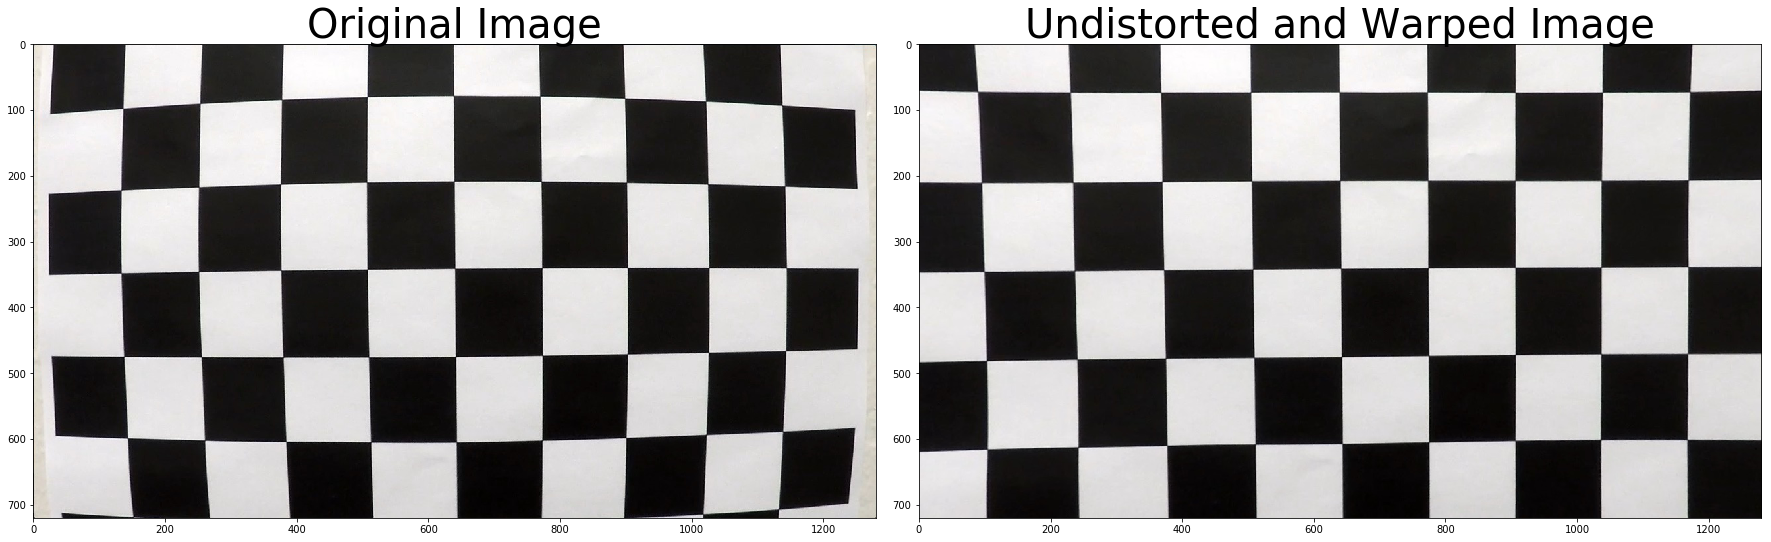

In [44]:
mtx, dist = calibrate()
         

### Lane Finding



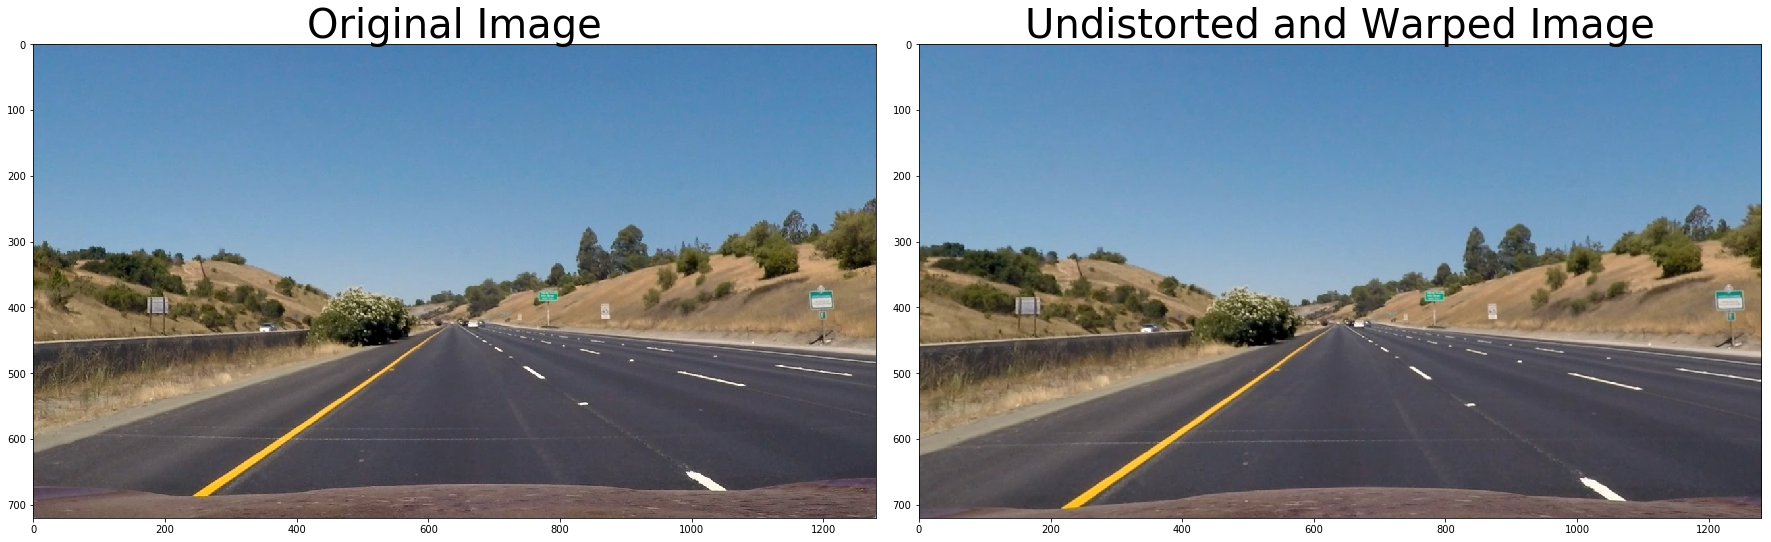

In [45]:
image_dist = mpimg.imread('test_images/straight_lines1.jpg')
image_undist = cv2.undistort(image_dist, mtx, dist, None, mtx)

plt.figure(11)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
f.tight_layout()
ax1.imshow(image_dist)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(image_undist)
ax2.set_title('Undistorted and Warped Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.) 
